<a href="https://colab.research.google.com/github/LucasIBoczkowski/CoderHouse/blob/main/Data%20Science/Desaf%C3%ADos/Datathon/Datathon_Lucas_Boczkowski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science
# Comisión: 42365
## Alumno: Lucas Boczkowski
#### Proyecto: Datathon - Predicción de precios de inmuebles (Clase 55)

## 1. Abstracto

Una “Datathon” es un evento en donde se reúnen personas con conocimientos en manejo de datos (e.g científicos de datos, Data Engineers, Data Analysts) con el fin de trabajar en forma multidisciplinaria permitiendo resolver preguntas problema relevantes para un problema específico.
Estos eventos tienen una duración limitada y se busca establecer diferentes enfoques a la hora de resolver un problema
<br><br>
El presente Datathon busca lograr predecir los precios de las viviendas residenciales en Ames, Iowa, Estados Unidos. Para ello, se deberán poner en práctica los diversos conceptos vistos y estudiados a lo largo del curso de Data Science.

## 2. Objetivo

Para cada Id en el conjunto de prueba, se debe predecir el valor de la variable “SalePrice”. La métrica que se utilizará para evaluar la performance del modelo deberá ser el RMSE (Root-Mean-Squared-Error (RMSE).
<br><br>
Como parte del desafío propuesto, se busca que los estudiantes puedan generar un archivo llamado: “predicción_inmueble.csv”, el cual deberá contener para cada “Id” de registro su correspondiente predicción. En base a la siguiente estructura:
<br><br>
ID   - Sales Price

1461 - 169000.1

1462 - 187724.1233

1563 - 175221

etc.
<br><br>

### Predicción de precios de inmuebles

Realizaremos lo siguiente:

1) Realizar la lectura de datos de los archivos propuestos

2) Llevar a cabo un análisis exploratorio de datos (EDA) con su correspondiente interpretación

3) En caso de ser necesario desarrollar el proceso de Data Wrangling

4) Desarrollar al menos 3 algoritmos de regresión para resolver el desafío

5) Calcular métricas como RMSE, R2, MAE para cada modelo

6) Implementar algún método de optimización de hiperparametros

7) Comparar distintos modelos creados

8) Seleccionar el mejor modelo justificando la decisión

9) Debatir colaborativamente en el proceso

### 2.1. Descripción de datos

*   train.csv: Dataset de Train.
*   test.csv: Dataset de Test.
*   data_description.txt: Descripción completa de cada columna del dataset.
*   ejemplo_output.csv: Dataset de referencia de la salida que se pretende generar como resultado de la aplicación del modelo de regresión.

## 3. Importación de librerías y conexión con Google Drive

In [1]:
# Instalo lo necesario para la optimización de hiperparámetros
! pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.5 MB/s eta 0:00:00


In [2]:
! pip install lightgbm

In [3]:
! pip install xgboost

In [108]:
# Librerías para trabajar con dataframes y gráficos
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import missingno as msno

# Conectar con Google Colab
from google.colab import drive, files

# Librerías para modelos de machine learning
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, median_absolute_error, mean_absolute_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor, GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
drive.mount('/content/mi_carpeta')
# Cambio al directorio de trabajo con el contenido a leer
%cd /content/mi_carpeta/MyDrive/'Colab Notebooks'/'Clase 55 - Datathon'

Mounted at /content/mi_carpeta
/content/mi_carpeta/MyDrive/Colab Notebooks/Clase 55 - Datathon


In [6]:
train=pd.read_csv('train.csv',sep=',')

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
print ("Para ver las primeras filas del dataset seleccionado ejecutamos la función head():")
train.head()

Para ver las primeras filas del dataset seleccionado ejecutamos la función head():


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Lo mismo con test
test=pd.read_csv('test.csv',sep=',')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 4. Exploración de datos (EDA)

### 4.1. Conociendo los datos

Primero que nada veamos la forma de los datasets:

In [9]:
print ("En total, nuestro dataset train posee " + str(train.shape[0]) + " filas y " + str(train.shape[1]) + " columnas de datos.")
print ("En total, nuestro dataset test posee " + str(test.shape[0]) + " filas y " + str(test.shape[1]) + " columnas de datos.")

En total, nuestro dataset train posee 1460 filas y 81 columnas de datos.
En total, nuestro dataset test posee 1459 filas y 80 columnas de datos.


Veamos la información general:

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Veamos en detalle qué contiene cada columna con su descripción, leyendo el archivo "data_description.txt":

In [12]:
with open('data_description.txt', 'r') as file:
    content = file.read()

print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

También podemos conocer el tipo de dato de cada columna de la siguiente manera:

In [13]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [14]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


Podemos hacer un análisis de sus variables más importantes, de esta manera:

In [15]:
print("Datos de train:")
print ("\u2022 Como fue chequeado anteriormente, hay " + str(train.shape[0]) + " viviendas para analizar con sus " + str(train.shape[1]) + " variables.")
print ("\u2022 Hay " + str(train['MSSubClass'].nunique()) + " tipos diferentes de vivienda.")
print ("\u2022 Hay " + str(train['MSZoning'].nunique()) + " tipos de clasificación general de zonificación de la venta.")
print ("\u2022 El lote más grande mide " + str(train['LotArea'].max()) + " pies cuadrados, y el mas chico mide " + str(train['LotArea'].min()) + " pies cuadrados.")
print ("\u2022 Las calles pavimentadas son " + str((train['Street'] == 'Pave').sum()))
print ("\u2022 Las calles de ripio son " + str((train['Street'] == 'Grvl').sum()))
print ("\u2022 Hay " + str(train['LotShape'].nunique()) + " formas de propiedades.")
print ("\u2022 Las viviendas se distribuyen en " + str(train['Neighborhood'].nunique()) + " barrios diferentes.")
print ("\u2022 La vivienda más antigua es del año " + str((train['YearBuilt'].min())) + " y la más nueva es del año " + str((train['YearBuilt'].max())) + ".")
print ("\u2022 Hay " + str((train['CentralAir'] == 'Y').sum()) + " con aire acondicionado central, mientras que " + str((train['CentralAir'] == 'N').sum()) + " no tienen aire acondicionado central.")
print ("\u2022 Hay casas con hasta " + str(train['Fireplaces'].max()) + " chimeneas.")
print ("\u2022 La vivienda más barata sale " + str((train['SalePrice'].min())) + " y la más cara " + str((train['SalePrice'].max())) + ".")

print("\nDatos de test:")
print ("\u2022 Como fue chequeado anteriormente, hay " + str(test.shape[0]) + " viviendas para analizar con sus " + str(test.shape[1]) + " variables.")
print ("\u2022 Hay " + str(test['MSSubClass'].nunique()) + " tipos diferentes de vivienda.")
print ("\u2022 Hay " + str(test['MSZoning'].nunique()) + " tipos de clasificación general de zonificación de la venta.")
print ("\u2022 El lote más grande mide " + str(test['LotArea'].max()) + " pies cuadrados, y el mas chico mide " + str(test['LotArea'].min()) + " pies cuadrados.")
print ("\u2022 Las calles pavimentadas son " + str((test['Street'] == 'Pave').sum()))
print ("\u2022 Las calles de ripio son " + str((test['Street'] == 'Grvl').sum()))
print ("\u2022 Hay " + str(test['LotShape'].nunique()) + " formas de propiedades.")
print ("\u2022 Las viviendas se distribuyen en " + str(test['Neighborhood'].nunique()) + " barrios diferentes.")
print ("\u2022 La vivienda más antigua es del año " + str((test['YearBuilt'].min())) + " y la más nueva es del año " + str((test['YearBuilt'].max())) + ".")
print ("\u2022 Hay " + str((test['CentralAir'] == 'Y').sum()) + " con aire acondicionado central, mientras que " + str((test['CentralAir'] == 'N').sum()) + " no tienen aire acondicionado central.")
print ("\u2022 Hay casas con hasta " + str(test['Fireplaces'].max()) + " chimeneas.")

Datos de train:
• Como fue chequeado anteriormente, hay 1460 viviendas para analizar con sus 81 variables.
• Hay 15 tipos diferentes de vivienda.
• Hay 5 tipos de clasificación general de zonificación de la venta.
• El lote más grande mide 215245 pies cuadrados, y el mas chico mide 1300 pies cuadrados.
• Las calles pavimentadas son 1454
• Las calles de ripio son 6
• Hay 4 formas de propiedades.
• Las viviendas se distribuyen en 25 barrios diferentes.
• La vivienda más antigua es del año 1872 y la más nueva es del año 2010.
• Hay 1365 con aire acondicionado central, mientras que 95 no tienen aire acondicionado central.
• Hay casas con hasta 3 chimeneas.
• La vivienda más barata sale 34900 y la más cara 755000.

Datos de test:
• Como fue chequeado anteriormente, hay 1459 viviendas para analizar con sus 80 variables.
• Hay 16 tipos diferentes de vivienda.
• Hay 5 tipos de clasificación general de zonificación de la venta.
• El lote más grande mide 56600 pies cuadrados, y el mas chico mide

Observemos un análisis de las estadísticas descriptivas de los datasets en sus columnas numéricas:

In [16]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## 5. Data Wrangling

### 5.1. Chequeo de duplicados

Corroboremos si tenemos filas duplicadas:

In [18]:
# Verifica si hay filas duplicadas en todo el DataFrame
train_duplicates = train.duplicated().sum()
test_duplicates = test.duplicated().sum()
print(f"Número de filas duplicadas en train: {train_duplicates}")
print(f"Número de filas duplicadas en test: {test_duplicates}")

Número de filas duplicadas en train: 0
Número de filas duplicadas en test: 0


Esto significa que no contamos con información duplicada, y cada fila es única.

### 5.2. Chequeo de valores ausentes



Podemos chequear la presencia de valores ausentes de varias maneras. Una forma es hacerlo mediante un gráfico como el siguiente:

<Axes: >

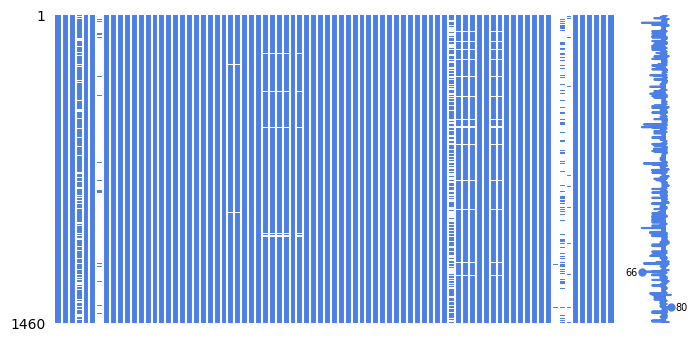

In [19]:
# en train
msno.matrix(train, figsize=(8,4), color=(0.3, 0.5, 0.9), fontsize=8)

<Axes: >

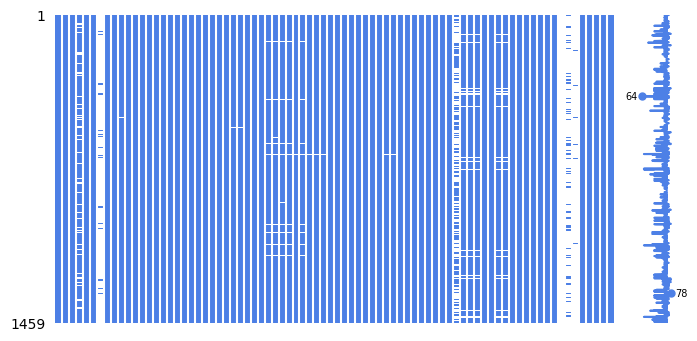

In [20]:
# en test
msno.matrix(test, figsize=(8,4), color=(0.3, 0.5, 0.9), fontsize=8)

A través del gráfico podemos observar que hay varias columnas con valores ausentes.

También podemos chequear si hay nulos con un listado, columna por columna:

In [21]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [22]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Podemos comparar ambos datasets para ver la cantidad de valores nulos que tiene cada columna tanto en train como en test:

In [23]:
# Creo un DataFrame con los nulos en ambos conjuntos
null_columns = pd.DataFrame({
    'Cantidad de nulos en Train': train.isnull().sum(),
    'Cantidad de nulos en Test': test.isnull().sum()
})
# Dejo en el DataFrame solo las las columnas con al menos un valor nulo
null_columns_filtered = null_columns[(null_columns['Cantidad de nulos en Train'] > 0) | (null_columns['Cantidad de nulos en Test'] > 0)]

# Para ordenar de mayor a menor, primero hago la suma de nulos en ambas columnas y
null_columns_filtered = null_columns_filtered.assign(Total_Nulls=null_columns_filtered.sum(axis=1))
null_columns_filtered = null_columns_filtered.sort_values(by='Total_Nulls', ascending=False)

# Elimino la columna temporal 'Total_Nulls'
null_columns_filtered = null_columns_filtered.drop(columns='Total_Nulls')

null_columns_filtered

,Cantidad de nulos en Train,Cantidad de nulos en Test
PoolQC,1453,1456.0
MiscFeature,1406,1408.0
Alley,1369,1352.0
Fence,1179,1169.0
FireplaceQu,690,730.0
LotFrontage,259,227.0
GarageCond,81,78.0
GarageQual,81,78.0
GarageYrBlt,81,78.0
GarageFinish,81,78.0


## 6. Feature engineering

### 6.1. Variable objetivo

Para cada Id en el conjunto de prueba, se debe predecir el valor de la variable “SalePrice”. La métrica que se utilizará para evaluar la performance del modelo deberá ser el RMSE (Root-Mean-Squared-Error (RMSE).

### 6.2. Análisis de valores nulos

Vamos a ver las variables que tienen valores nulos en train y tomar una decisión de qué hacer para cada caso.

In [24]:
train.PoolQC.value_counts() # Esta la vamos a sacar

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [25]:
train.MiscFeature.value_counts() # Esta la vamos a sacar

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [26]:
train.Alley.value_counts() # Esta la vamos a sacar

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [27]:
train.Fence.value_counts() # Esta la vamos a sacar

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [28]:
train.FireplaceQu.value_counts() # Reemplazo los vacios por Desconocido

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [29]:
train.LotFrontage.isnull().sum() # Relleno los nulos con el promedio de la columna

259

In [30]:
train.GarageFinish.value_counts() # Reemplazo los vacios por Desconocido

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [31]:
train.GarageQual.value_counts() # Reemplazo los vacios por Desconocido

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [32]:
train.GarageCond.value_counts() # Reemplazo los vacios por Desconocido

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [33]:
train.GarageType.value_counts() # Reemplazo los vacios por Desconocido

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [34]:
train.BsmtExposure.value_counts() # Reemplazo los vacios por Desconocido

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [35]:
train.GarageYrBlt.isnull().sum() # Relleno los nulos con el promedio de la columna

81

In [36]:
train.BsmtFinType2.value_counts() # Reemplazo los vacios por Desconocido

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [37]:
train.BsmtFinType1.value_counts() # Reemplazo los vacios por Desconocido

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [38]:
train.BsmtCond.value_counts() # Reemplazo los vacios por Desconocido

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [39]:
train.BsmtQual.value_counts() # Reemplazo los vacios por Desconocido

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [40]:
train.MasVnrArea.isnull().sum() # Relleno los nulos con el promedio de la columna

8

In [41]:
train.MasVnrType.value_counts() # Reemplazo los vacios por Desconocido

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [42]:
train.Electrical.value_counts() # Reemplazo los vacios por Desconocido

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [43]:
train.shape

(1460, 81)

### 6.3. Borrado de columnas

Vamos a eliminar las columnas que no nos interesa tener.

In [44]:
# Columnas a borrar que no aportan
col_del=['PoolQC','MiscFeature','Alley','Fence','Id', 'SalePrice']

In [45]:
# Borro las variables que no me interesa tener
X = train.drop(labels=col_del, axis=1)
X.columns # Verificando las columnas que quedaron por las dudas

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

### 6.4. Reemplazo de nulos categóricos por "Desconocido"

In [46]:
# Columnas categóricas que tienen al menos un nulo
col_cat= ['GarageQual','FireplaceQu','GarageFinish','GarageCond','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond',
          'BsmtQual','MasVnrType','Electrical']

In [47]:
# Reemplazo los vacios por Desconocido
for i in col_cat:
  X[i] = X[i].fillna('Desconocido')

### 6.5. Definición de "y", "training", "validation" y "test"

In [48]:
# Nuestra variable objetivo
y = train.SalePrice

In [49]:
# Split de la data en training, validation y testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

Podemos chequear cómo quedó cada conjunto de X, correspondientes a:
- Training y Validation
- Training
- Validation
- Test

In [50]:
print(X_trainval.shape, X_train.shape, X_val.shape, X_test.shape)

(1168, 75) (876, 75) (292, 75) (292, 75)


Esto nos indica la forma de cada uno de nuestros sets, siendo X_trainval el más grande y el que usaremos para procesar los datos que luego replicarlos en los otros conjuntos.

### 6.6. Tratamiento de valores nulos en variables numéricas

Lo que haré es llenar los valores nulos en X_trainval con el promedio en cada columna correspondiente, mientras que en al resto de los conjuntos los llenaremos con el promedio obtenido de X_trainval.

In [51]:
# tratamiento de valores nulos en X_trainval
for i in range(X_trainval.shape[1]):
  if X_trainval.iloc[i:,i].isnull().sum() > 0:
    X_trainval.iloc[:,i] = X_trainval.iloc[:,i].replace(np.nan, X_trainval.iloc[:,i].mean())

In [52]:
# Uso la media de cada columna de X_trainval para rellenar los nulos en el resto de los conjuntos de X
X_trainval.mean(numeric_only=True)

MSSubClass          56.849315
LotFrontage         70.343849
LotArea          10689.642123
OverallQual          6.121575
OverallCond          5.584760
YearBuilt         1970.965753
YearRemodAdd      1984.897260
MasVnrArea         103.771945
BsmtFinSF1         446.023973
BsmtFinSF2          45.152397
BsmtUnfSF          570.595034
TotalBsmtSF       1061.771404
1stFlrSF          1169.354452
2ndFlrSF           352.351027
LowQualFinSF         5.696062
GrLivArea         1527.401541
BsmtFullBath         0.425514
BsmtHalfBath         0.057363
FullBath             1.577055
HalfBath             0.381849
BedroomAbvGr         2.890411
KitchenAbvGr         1.047945
TotRmsAbvGrd         6.561644
Fireplaces           0.618151
GarageYrBlt       1978.662138
GarageCars           1.781678
GarageArea         476.273973
WoodDeckSF          95.946918
OpenPorchSF         49.578767
EnclosedPorch       21.839041
3SsnPorch            3.812500
ScreenPorch         15.407534
PoolArea             2.955479
MiscVal   

In [53]:
# tratamiento de valores nulos en X_train, X_val y X_test,
# rellenando nulos con el promedio de cada columna correspondiente de X_trainval
def fillna_with_trainval_mean(df, reference_df):
    return df.fillna(reference_df.mean(numeric_only=True))

X_train = fillna_with_trainval_mean(X_train, X_trainval)
X_val = fillna_with_trainval_mean(X_val, X_trainval)
X_test = fillna_with_trainval_mean(X_test, X_trainval)

Comprobemos que ya no quedan nulos en ninguno de los conjuntos de X:

In [54]:
dataframes = [X_trainval, X_train, X_val, X_test]
for df in dataframes:
    total_null_values = df.isnull().sum().sum()
    print(total_null_values)

0
0
0
0


### 6.7. Selección de variables

Selecciono por un lado las variables numéricas y por otro las variables categóricas, para poder aplicarles el tratamiento necesario.

In [55]:
# Obtener columnas numéricas
X_trainval_numerical_data = X_trainval.select_dtypes(include=['int64', 'float64'])
X_train_numerical_data = X_train.select_dtypes(include=['int64', 'float64'])
X_val_numerical_data = X_val.select_dtypes(include=['int64', 'float64'])
X_test_numerical_data = X_test.select_dtypes(include=['int64', 'float64'])

# Obtener columnas categóricas
X_trainval_categorical_data = X_trainval.select_dtypes(include=['object'])
X_train_categorical_data = X_train.select_dtypes(include=['object'])
X_val_categorical_data = X_val.select_dtypes(include=['object'])
X_test_categorical_data = X_test.select_dtypes(include=['object'])

In [56]:
# Vemos la forma de cada dataset numérico
print(X_trainval_numerical_data.shape, X_train_numerical_data.shape, X_val_numerical_data.shape, X_test_numerical_data.shape)

(1168, 36) (876, 36) (292, 36) (292, 36)


In [57]:
# Vemos la forma de cada dataset categórico
print(X_trainval_categorical_data.shape, X_train_categorical_data.shape, X_val_categorical_data.shape, X_test_categorical_data.shape)

(1168, 39) (876, 39) (292, 39) (292, 39)


### 6.8. Estandarización de variables numéricas

Normalizo las variables numéricas de interés con el método de StandardScaler.

In [58]:
# Normalización de datos numéricos
scaler = StandardScaler()

# Aplico la normalización y los convierto a DataFrame
X_trainval_numerical_data_norm = pd.DataFrame(scaler.fit_transform(X_trainval_numerical_data), columns=X_trainval_numerical_data.columns)
X_train_numerical_data_norm = pd.DataFrame(scaler.transform(X_train_numerical_data), columns=X_train_numerical_data.columns)
X_val_numerical_data_norm = pd.DataFrame(scaler.transform(X_val_numerical_data), columns=X_val_numerical_data.columns)
X_test_numerical_data_norm = pd.DataFrame(scaler.transform(X_test_numerical_data), columns=X_test_numerical_data.columns)

In [59]:
# Vemos la forma de cada dataset numérico normalizado
print(X_trainval_numerical_data_norm.shape, X_train_numerical_data_norm.shape, X_val_numerical_data_norm.shape, X_test_numerical_data_norm.shape)

(1168, 36) (876, 36) (292, 36) (292, 36)


### 6.9. Utilización de One-Hot Encoding

Primero, veamos las columnas categóricas, para ver que coincidan en todos los datasets:

In [60]:
print(set(X_trainval_categorical_data.columns))
print(set(X_train_categorical_data.columns))
print(set(X_val_categorical_data.columns))
print(set(X_test_categorical_data.columns))

{'Utilities', 'Functional', 'BsmtExposure', 'RoofMatl', 'PavedDrive', 'LotShape', 'BldgType', 'BsmtFinType1', 'BsmtQual', 'ExterCond', 'SaleCondition', 'LandSlope', 'GarageQual', 'Heating', 'Electrical', 'MSZoning', 'LandContour', 'LotConfig', 'MasVnrType', 'SaleType', 'Exterior1st', 'Neighborhood', 'Condition1', 'BsmtFinType2', 'GarageType', 'FireplaceQu', 'Condition2', 'Street', 'RoofStyle', 'GarageFinish', 'GarageCond', 'HeatingQC', 'KitchenQual', 'CentralAir', 'HouseStyle', 'ExterQual', 'Exterior2nd', 'Foundation', 'BsmtCond'}
{'Utilities', 'Functional', 'BsmtExposure', 'RoofMatl', 'PavedDrive', 'LotShape', 'BldgType', 'BsmtFinType1', 'BsmtQual', 'ExterCond', 'SaleCondition', 'LandSlope', 'GarageQual', 'Heating', 'Electrical', 'MSZoning', 'LandContour', 'LotConfig', 'MasVnrType', 'SaleType', 'Exterior1st', 'Neighborhood', 'Condition1', 'BsmtFinType2', 'GarageType', 'FireplaceQu', 'Condition2', 'Street', 'RoofStyle', 'GarageFinish', 'GarageCond', 'HeatingQC', 'KitchenQual', 'Central

Para las columnas categóricas, aplico one-hot encoding utilizando la función get_dummies:

In [61]:
# Obtengo la unión de todas las categorías
all_categories = set(X_trainval_categorical_data.stack()) | set(X_train_categorical_data.stack()) | set(X_val_categorical_data.stack()) | set(X_test_categorical_data.stack())

# Aplico One-Hot Encoding y reindexo para incluir todas las categorías
X_trainval_categorical_data_encoded = pd.get_dummies(X_trainval_categorical_data)
X_trainval_categorical_data_encoded = X_trainval_categorical_data_encoded.reindex(columns=all_categories, fill_value=0)

X_train_categorical_data_encoded = pd.get_dummies(X_train_categorical_data)
X_train_categorical_data_encoded = X_train_categorical_data_encoded.reindex(columns=all_categories, fill_value=0)

X_val_categorical_data_encoded = pd.get_dummies(X_val_categorical_data)
X_val_categorical_data_encoded = X_val_categorical_data_encoded.reindex(columns=all_categories, fill_value=0)

X_test_categorical_data_encoded = pd.get_dummies(X_test_categorical_data)
X_test_categorical_data_encoded = X_test_categorical_data_encoded.reindex(columns=all_categories, fill_value=0)

In [62]:
# Vemos la forma de cada dataset categórico luego de aplicar One-Hot Encoding y de indexar
print(X_trainval_categorical_data_encoded.shape, X_train_categorical_data_encoded.shape, X_val_categorical_data_encoded.shape, X_test_categorical_data_encoded.shape)

(1168, 168) (876, 168) (292, 168) (292, 168)


In [63]:
# También se puede hacer uno por línea
print(X_trainval_categorical_data_encoded.shape)
print(X_train_categorical_data_encoded.shape)
print(X_val_categorical_data_encoded.shape)
print(X_test_categorical_data_encoded.shape)

(1168, 168)
(876, 168)
(292, 168)
(292, 168)


### 6.9. Unión de los datasets

Finalmente, unimos el dataset de variables numéricas con el de variables categóricas en cada uno de los conjuntos para poder aplicar en los modelos, pero antes de eso reseteo los índices:

In [64]:
# Listo los conjuntos para resetear sus índices
dataframes_to_reset = [X_trainval, X_train, X_val, X_test]
numerical_data_to_reset = [X_trainval_numerical_data_norm, X_train_numerical_data_norm, X_val_numerical_data_norm, X_test_numerical_data_norm]
categorical_data_to_reset = [X_trainval_categorical_data_encoded, X_train_categorical_data_encoded, X_val_categorical_data_encoded, X_test_categorical_data_encoded]
y_to_reset = [y_trainval, y_train, y_val, y_test]

# Realizo el reset de los índices con FOR
for dataset in dataframes_to_reset:
    dataset.reset_index(drop=True, inplace=True)

for numerical_data in numerical_data_to_reset:
    numerical_data.reset_index(drop=True, inplace=True)

for categorical_data in categorical_data_to_reset:
    categorical_data.reset_index(drop=True, inplace=True)

for target in y_to_reset:
    target.reset_index(drop=True, inplace=True)

In [65]:
# Veamos la forma de los datasets de X previo a la unión de los conjuntos numéricos y categóricos
print(X_trainval.shape, X_train.shape, X_val.shape, X_test.shape)

(1168, 75) (876, 75) (292, 75) (292, 75)


In [66]:
# Uno los dataframes por columnas
X_trainval = pd.concat([X_trainval_numerical_data_norm, X_trainval_categorical_data_encoded], axis=1)
X_train = pd.concat([X_train_numerical_data_norm, X_train_categorical_data_encoded], axis=1)
X_val = pd.concat([X_val_numerical_data_norm, X_val_categorical_data_encoded], axis=1)
X_test = pd.concat([X_test_numerical_data_norm, X_test_categorical_data_encoded], axis=1)

In [67]:
# Ahora si, veamos la forma de los datasets de X luego de la unión de los conjuntos numéricos y categóricos
print(X_trainval.shape, X_train.shape, X_val.shape, X_test.shape)

(1168, 204) (876, 204) (292, 204) (292, 204)


Rechequeamos no contar con nulos:

In [68]:
dataframes = [X_trainval, X_train, X_val, X_test]
for df in dataframes:
    total_null_values = df.isna().sum().sum()
    print(total_null_values)

0
0
0
0


## 7. Modelos de Machine Learning

### 7.1. Optimización de hiperparámetros

Para utilizar mejores hiperparámetros, utilizaremos la técnica conocida como Randomized Search, la cual efectúa una búsqueda aleatoria, y permite un descubrimiento bastante preciso de buenos valores para los hiperparámetros más importantes.

In [69]:
# Primero convierto todas las variables a nombres de tipo cadena (string)
X_trainval.columns = X_trainval.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

Definamos los hiperparámetros para cada modelo utilizado:

In [70]:
# AdaBoostRegressor
adaboost_param_space = {
    'n_estimators': (10, 200),        # Rango para el número de estimadores
    'learning_rate': (0.01, 1.0),     # Rango para la tasa de aprendizaje
}

# GradientBoostingRegressor
gradientboost_param_space = {
    'n_estimators': (50, 200),        # Rango para el número de estimadores
    'learning_rate': (0.01, 1.0),     # Rango para la tasa de aprendizaje
    'max_depth': (3, 10),             # Rango para la profundidad máxima del árbol
}

# LightGBM
lightgbm_param_space = {
    'n_estimators': (50, 200),        # Rango para el número de estimadores
    'learning_rate': (0.01, 1.0),     # Rango para la tasa de aprendizaje
    'num_leaves': (8, 128),           # Rango para el número de nodos
    'max_depth': (3, 10),             # Rango para la profundidad máxima del árbol
}

# XGBoost
xgboost_param_space = {
    'n_estimators': (50, 200),        # Rango para el número de estimadores
    'learning_rate': (0.01, 1.0),     # Rango para la tasa de aprendizaje
    'max_depth': (3, 10),             # Rango para la profundidad máxima del árbol
    'gamma': (0.01, 1.0),             # Rango para el parámetro de penalización gamma
}

# Agrego estos espacios al diccionario param_spaces
param_spaces = {} # Inicializo el diccionario
param_spaces[AdaBoostRegressor()] = adaboost_param_space
param_spaces[GradientBoostingRegressor()] = gradientboost_param_space
param_spaces[LGBMRegressor()] = lightgbm_param_space
param_spaces[XGBRegressor()] = xgboost_param_space

Veamos todos los hiperparámetros que definimos:

In [71]:
for model, param_space in param_spaces.items():
    print(f"Modelo: {model.__class__.__name__}")
    for param, value in param_space.items():
        print(f"{param}: {value}")

Modelo: AdaBoostRegressor
n_estimators: (10, 200)
learning_rate: (0.01, 1.0)
Modelo: GradientBoostingRegressor
n_estimators: (50, 200)
learning_rate: (0.01, 1.0)
max_depth: (3, 10)
Modelo: LGBMRegressor
n_estimators: (50, 200)
learning_rate: (0.01, 1.0)
num_leaves: (8, 128)
max_depth: (3, 10)
Modelo: XGBRegressor
n_estimators: (50, 200)
learning_rate: (0.01, 1.0)
max_depth: (3, 10)
gamma: (0.01, 1.0)


Ahora ejecutamos la búsqueda de hiperparámetros para cada modelo, registrando los mejores encontrados y verificando si hay duplicados en los hiperparámetros evaluados.

In [72]:
# Definir la métrica RMSE para utilizarla en la búsqueda
rmse_scorer = make_scorer(lambda y_true, y_pred: sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Modificar el código para utilizar la métrica RMSE
evaluated_params = []

for model, param_space in param_spaces.items():
    search = RandomizedSearchCV(
        model,
        param_space,
        n_iter=4,
        cv=5,
        n_jobs=-1,
        scoring=rmse_scorer,  # Utilizar la métrica RMSE
        random_state=42
    )
    search.fit(X_train, y_train)

    best_params = search.best_params_
    best_score = search.best_score_

    # Para registrar los parámetros evaluados
    evaluated_params.append(best_params)

    print(f"Modelo: {model.__class__.__name__}")
    print(f"Mejores Hiperparámetros: {best_params}")
    print(f"Mejor Puntuación RMSE: {best_score}\n")

# Para verificar si hay duplicados en los parámetros evaluados
duplicates = [params for params in evaluated_params if evaluated_params.count(params) > 1]
print("Duplicados en los parámetros evaluados:", duplicates)

Modelo: AdaBoostRegressor
Mejores Hiperparámetros: {'n_estimators': 200, 'learning_rate': 1.0}
Mejor Puntuación RMSE: -37871.60022790528

Modelo: GradientBoostingRegressor
Mejores Hiperparámetros: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}
Mejor Puntuación RMSE: -37326.42824447765

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2718
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 33
[LightGBM] [Info] Start training from score 181233.968037
Modelo: LGBMRegressor
Mejores Hiperparámetros: {'num_leaves': 8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 1.0}
Mejor Puntuación RMSE: -41206.40749811211

Modelo: XGBRegressor
Mejores Hiperparámetr

El hecho de que no haya duplicados en los parámetros evaluados (Duplicados en los parámetros evaluados: []) es una buena señal. Esto significa que la búsqueda de hiperparámetros se ha completado sin problemas y que no hay configuraciones idénticas entre las evaluadas, genial!

También podemos ver los mejores hiperprámetros de la siguiente manera:

In [73]:
# veamos los mejores parámetros encontrados:
evaluated_params

[{'n_estimators': 200, 'learning_rate': 1.0},
 {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01},
 {'num_leaves': 8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 1.0},
 {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.01}]

### 7.2. Evaluación de modelos

Ahora sí, evaluamos los modelos teniendo en cuenta los mejores hiperprámetros encontrados.

In [74]:
# Lista de modelos a comparar y sus parámetros, acá asigno los parámetros para cada modelo
models = [
    ("AdaBoost", AdaBoostRegressor(**evaluated_params[0])),
    ("Gradient Boosting", GradientBoostingRegressor(**evaluated_params[1])),
    ("LGBM", LGBMRegressor(**evaluated_params[2])),
    ("XGB", XGBRegressor(**evaluated_params[3]))
]

df_metrics = pd.DataFrame()  # Dataframe para comparar las métricas para cada modelo

for model_name, model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    df_results = pd.DataFrame({
        "Modelo": [model_name],
        "MSE en training": [train_mse],
        "MSE en validation": [val_mse],
        "RMSE en training": [train_rmse],
        "RMSE en validation": [val_rmse],
        "R2 en training": [train_r2],
        "R2 en validation": [val_r2],
        "MAE en training": [train_mae],
        "MAE en validation": [val_mae]
    })

    df_metrics = pd.concat([df_metrics, df_results], axis=0).reset_index(drop=True)

# df_metrics contiene los resultados de MSE, RMSE, R2 y MAE para cada modelo en los conjuntos de entrenamiento y validación


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2718
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 33
[LightGBM] [Info] Start training from score 181233.968037


In [75]:
df_metrics["Diferencia de MSE entre training y validation"] = df_metrics["MSE en training"] - df_metrics["MSE en validation"]
df_metrics["Diferencia de RMSE entre training y validation"] = df_metrics["RMSE en training"] - df_metrics["RMSE en validation"]
df_metrics["Diferencia de R2 entre training y validation"] = df_metrics["R2 en training"] - df_metrics["R2 en validation"]
df_metrics["Diferencia de RMAE entre training y validation"] = df_metrics["MAE en training"] - df_metrics["MAE en validation"]
df_metrics

,Modelo,MSE en training,MSE en validation,RMSE en training,RMSE en validation,R2 en training,R2 en validation,MAE en training,MAE en validation,Diferencia de MSE entre training y validation,Diferencia de RMSE entre training y validation,Diferencia de R2 entre training y validation,Diferencia de RMAE entre training y validation
0,AdaBoost,8.574009e+08,1.352666e+09,29281.408339,36778.601711,0.856054,0.774120,23659.354813,26688.961571,-4.952647e+08,-7497.193372,0.081935,-3029.606758
1,Gradient Boosting,8.043239e+08,1.102570e+09,28360.604288,33204.965968,0.864965,0.815883,19539.850140,22479.189903,-2.982459e+08,-4844.361680,0.049082,-2939.339763
2,LGBM,5.242472e+05,1.495678e+09,724.049163,38673.992961,0.999912,0.750238,520.486643,25792.458180,-1.495153e+09,-37949.943798,0.249674,-25271.971538
3,XGB,8.683212e+08,1.217304e+09,29467.289510,34889.881589,0.854221,0.796724,19660.559503,22841.864913,-3.489827e+08,-5422.592079,0.057497,-3181.305410


Cuanto más bajo es el RMSE, mejor es la capacidad predictiva del modelo, ya que indica que las predicciones están más cerca de los valores reales. Con lo cual parecería mi mejor modelo por ahora es Gradient Boosting (viendo los datos de la columna "RMSE en validation") .

Agrego la validación cruzada con las evaluaciones de todos los modelos:

In [76]:
# Lista de modelos a comparar y los mejores hiperparámetros encontrados
models = [
    ("AdaBoost", AdaBoostRegressor(**evaluated_params[0])),
    ("Gradient Boosting", GradientBoostingRegressor(**evaluated_params[1])),
    ("LGBM", LGBMRegressor(**evaluated_params[2])),
    ("XGB", XGBRegressor(**evaluated_params[3]))
]

n_folds = 5  # Número de folds (pliegues)

results = []

# Realizo validación cruzada para cada modelo con un FOR
for model_name, model in models:
    scores = cross_val_score(model, X_trainval, y_trainval, cv=n_folds, scoring='neg_mean_squared_error')
    avg_rmse = (-scores.mean())**0.5  # tomo la raíz cuadrada para obtener el RMSE
    std_rmse = scores.std()**0.5  # La desviación estándar de RMSE

    print(f"Resultados de {model_name}:")
    print(f"Puntajes RMSE en cada partición: {(-scores)**0.5}")
    print(f"Promedio del RMSE: {avg_rmse}")
    print(f"Desviación Estándar del RMSE: {std_rmse}\n")

    results.append({'Modelo': model_name, 'Promedio RMSE': avg_rmse, 'Desviación Estándar RMSE': std_rmse})

# Creo un DataFrame con los resultados
df_cross_validation = pd.DataFrame(results)

# Imprimo los resultados
print(df_cross_validation)

Resultados de AdaBoost:
Puntajes RMSE en cada partición: [37551.02520159 41877.37723804 41287.81009187 35741.67048373
 32407.58940383]
Promedio del RMSE: 37937.30707402624
Desviación Estándar del RMSE: 16238.826484664609

Resultados de Gradient Boosting:
Puntajes RMSE en cada partición: [38282.57918161 36493.87723447 43642.96493275 32265.04785312
 28892.26581497]
Promedio del RMSE: 36270.82483045867
Desviación Estándar del RMSE: 19178.14693656148

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2756
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 33
[LightGBM] [Info] Start training from score 181121.274090
[LightGBM] [Warning] Found whitespace in feature_names, rep

- **Promedio RMSE**:

El modelo de Gradient Boosting tiene el RMSE más bajo seguido por XGBoost. Estos dos modelos parecen tener un rendimiento similar, pero XGBoost tiene una desviación estándar más baja.

- **Desviación Estándar del RMSE**:

La desviación estándar del RMSE proporciona información sobre la consistencia del rendimiento del modelo en diferentes pliegues. Un valor más bajo indica una mayor consistencia. En este caso, el modelo de Gradient Boosting tiene la desviación estándar más alta, lo que sugiere una variabilidad significativa en el rendimiento entre pliegues. El modelo de XGBoost tiene una desviación estándar un poco más baja que el otro modelo mencionado.

- **Análisis Específico del LGBM**:

El modelo LGBM tiene un RMSE promedio de 38365.03, que es ligeramente más alto que los modelos de Gradient Boosting y XGBoost. Además, la desviación estándar del RMSE es más baja en comparación con los otros modelos, lo que indica una mayor consistencia en el rendimiento entre los pliegues.

- **Consideraciones Adicionales**:

AdaBoost tiene un RMSE promedio de 37937.31 con una desviación estándar moderada.

- **Resumen**:

El modelo de Gradient Boosting y XGBoost muestran un rendimiento competitivo, parecieran ser los mejorcitos. El modelo LGBM también muestra consistencia en el rendimiento, aunque su RMSE promedio es un poco más alto que los otros dos modelos mencionados.

- **Decisión**:

Me quedo con XGBoost.

## 8. Evaluando el mejor modelo (XGBoost)

Me voy a quedar con XGBoost. Veamos su comportamiento con datos no conocidos, es decir en X_Test y comparémoslo con sus otras predicciones.

In [77]:
# Creo el modelo XGBoost
model = XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.01, gamma=0.01)

# Entreno el modelo XGBoost con los datos de entrenamiento
model.fit(X_train, y_train)
# Predecir con la data de train
y_train_pred = model.predict(X_train)
# Predecir con la data de val
y_val_pred = model.predict(X_val)
# Entrenar el modelo con trainval
model.fit(X_trainval, y_trainval)
# Predecir con la data de test
y_test_pred = model.predict(X_test)

# Métricas RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Métricas R2
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Métricas MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Métricas MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Imprimir resultados
print("RMSE en training:", train_rmse)
print("R2 en training:", train_r2)
print("MAE en training:", train_mae)
print("MSE en training:", train_mse)

print("\nRMSE en validation:", val_rmse)
print("R2 en validation:", val_r2)
print("MAE en validation:", val_mae)
print("MSE en validation:", val_mse)

print("\nRMSE en test:", test_rmse)
print("R2 en test:", test_r2)
print("MAE en test:", test_mae)
print("MSE en test:", test_mse)

RMSE en training: 29467.28951040324
R2 en training: 0.8542209907578713
MAE en training: 19660.559503424658
MSE en training: 868321151.0899208

RMSE en validation: 34889.881589487566
R2 en validation: 0.796723754602249
MAE en validation: 22841.864913313355
MSE en validation: 1217303837.3284633

RMSE en test: 37986.50380718915
R2 en test: 0.8118757361138665
MAE en test: 23269.11266588185
MSE en test: 1442974471.4935956


- **RMSE**:

El RMSE mide la diferencia entre los valores reales y las predicciones del modelo. Cuanto más bajo sea el RMSE, mejor será el rendimiento del modelo. Se observa que el RMSE es más bajo en el conjunto de entrenamiento en comparación con los conjuntos de validación y prueba, lo cual es esperado ya que el modelo se ajusta a los datos de entrenamiento.

- **R^2**:

El coeficiente de determinación R^2 indica qué tan bien el modelo explica la variabilidad de los datos. Un R^2 más cercano a 1 significa que el modelo explica una mayor proporción de la varianza. Los valores de R^2 son bastante buenos, sugiriendo que el modelo está capturando una buena cantidad de variabilidad en los datos.

- **MAE**:

El MAE representa la magnitud promedio de los errores en las predicciones del modelo. Al igual que el RMSE, es una medida de la precisión del modelo. Un MAE más bajo indica un mejor rendimiento.

- **MSE**:

El MSE es el cuadrado del RMSE y también mide la magnitud promedio de los errores al cuadrado. Al igual que el RMSE, un MSE más bajo indica un mejor rendimiento.

- **Comparación de Resultados**:

La verdad es que es bueno que los RMSE en los conjuntos de validación y prueba no sean significativamente más alto que en el conjunto de entrenamiento.

La verdad es que los resultados sugieren que el modelo tiene un buen rendimiento en el conjunto de prueba. Esto sugiere que el modelo está generalizando razonablemente bien a datos no vistos.

## 9. Haciendo el proceso pero con Pipeline

Vamos a mejorar la forma de preprocesar la información, de tunear hiperparámetros, de elegir el mejor modelo (en la familia de modelos de XHBoost) y ver sus resultados, mediante la técnica de Pipeline.

In [86]:
# Empiezo de nuevo, tomando los datos del csv de train
train_pipeline=pd.read_csv('train.csv',sep=',')

# Borro las variables que no me interesa tener
X = train_pipeline.drop(labels=col_del, axis=1)

# Nuestra variable objetivo
y = train_pipeline.SalePrice

# Ahora hago el split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=1214)

In [87]:
# Necesito hacerlo con Pipeline para no estandarizar al hacer cross validation
# pipeline de preprocesamiento:

    # para las categóricas nominales
cat_nom_pipeline = Pipeline(
    steps=[
        ('imputador', SimpleImputer(strategy="constant", fill_value="Desconocido")),
        ('ohe', OneHotEncoder(handle_unknown="ignore", sparse_output=False))

    ]
)

    # para las numericas
num_pipeline = Pipeline(
    steps=[
        ('imputador', SimpleImputer(strategy="mean")),
        ('ss', StandardScaler()),
        ('PCA', PCA(n_components=5))
    ]
)

    # Union de pipelines en un pipeline de preprocesamiento
prep_pipeline = ColumnTransformer(
    transformers=[
        ('pipeline_nums', num_pipeline, X_trainval.select_dtypes(include=['int64', 'float64']).columns.tolist()),
        ('pipeline_nominales', cat_nom_pipeline, X_trainval.select_dtypes(include=['object']).columns.tolist())
    ],
    remainder='passthrough'
)

Con esto, hago pipeline de modelado con tuneo de hiperparámetros.

In [88]:
# pipeline de modelado
pipe_ml = Pipeline(
    steps=[
        ('preprocesamiento', prep_pipeline),
        ('modelo', XGBRegressor())
    ]
)

xgb_params = {
    "modelo__n_estimators": [50, 200],
    "modelo__max_depth": [3, 5, 7, 10],
    "modelo__learning_rate": [0.01, 0.05, 0.1, 0.2, 1.0],
    "modelo__gamma": [0.01, 1.0],
    "modelo__colsample_bytree": [0.7, 0.85, 1.0]
}
#Osea, 2*4*5*2*3 = 240 combinaciones

# Configuración de GridSearchCV con la métrica negativa de RMSE
scorer = make_scorer(mean_squared_error, greater_is_better=True, squared=False)
best_model = GridSearchCV(pipe_ml, param_grid=xgb_params, cv=5, n_jobs=-1, scoring=scorer, refit=True, error_score='raise') # cv es 5 entonces es 576 * 5, una guasada

# Ahora si, entreno el modelo
best_model.fit(X_trainval, y_trainval)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline_nums',
                                                                         Pipeline(steps=[('imputador',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler()),
                                                                                         ('PCA',
                                                                                          PCA(n_components=5))]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',...
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'modelo__colsample_bytree': [0.7, 0.85, 1.0],
                         'modelo__gamma': [0.01, 1.0],
                         'modelo__learning_rate': [0.01, 0.05, 0.1, 0.2, 1.0],
                         'modelo__max_depth': [3, 5, 7, 10],
                         'modelo__n_estimators': [50, 200]},
             scoring=make_scorer(mean_squared_error, squared=False))

In [89]:
# Solo para chequear el tipo de dato en y_trainval
# Deben ser del tipo de datos numérico.
print("Tipo de datos de y_trainval:", y_trainval.dtype)

Tipo de datos de y_trainval: int64


In [90]:
# Solo para ver si tenia algun valor faltante en y_trainval
print("Valores faltantes en y_trainval:", y_trainval.isnull().sum())

Valores faltantes en y_trainval: 0


In [91]:
# Y esto es simplemente para inspeccionar el rango y la distribución de las etiquetas.
# Esto me puede ayudar a entender si las etiquetas están en un rango razonable para un problema de regresión.
print("Rango de y_trainval:", y_trainval.min(), y_trainval.max())

Rango de y_trainval: 34900 755000


Ahora sí, las evaluaciones:

In [92]:
pd.DataFrame(best_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modelo__colsample_bytree,param_modelo__gamma,param_modelo__learning_rate,param_modelo__max_depth,param_modelo__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.166232,0.016088,0.022133,0.000481,0.7,0.01,0.01,3,50,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 3, 'modelo__n_estimators': 50}",60363.120129,63120.090066,51124.489555,52639.094892,54822.150453,56413.789019,4589.771407,2
1,0.348566,0.007518,0.023404,0.002010,0.7,0.01,0.01,3,200,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 3, 'modelo__n_estimators': 200}",35743.913354,42507.153293,26866.408353,26773.492492,30567.211467,32491.635792,5982.167762,65
2,0.232215,0.007685,0.023310,0.000865,0.7,0.01,0.01,5,50,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 5, 'modelo__n_estimators': 50}",59726.210615,62582.287707,50584.782559,51443.706370,54241.743134,55715.746077,4690.053610,4
3,0.636461,0.008875,0.023969,0.000964,0.7,0.01,0.01,5,200,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 5, 'modelo__n_estimators': 200}",35986.611600,43440.637901,25087.405143,25307.670576,29353.665047,31835.198053,7017.404060,85
4,0.375302,0.010985,0.023231,0.000590,0.7,0.01,0.01,7,50,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 7, 'modelo__n_estimators': 50}",60312.641400,61950.198535,50732.857119,51123.575420,53738.373073,55571.529109,4684.507853,8
5,2.133652,0.187108,0.037705,0.010207,0.7,0.01,0.01,7,200,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 7, 'modelo__n_estimators': 200}",35684.237345,43600.441412,25104.734485,25792.645737,28853.230024,31807.057801,6984.780699,86
6,1.060476,0.064241,0.039647,0.011914,0.7,0.01,0.01,10,50,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 10, 'modelo__n_estimators': 50}",60419.145583,62111.363432,50852.636914,51314.446809,53793.682415,55698.255030,4684.868265,5
7,2.591229,0.203778,0.029561,0.001938,0.7,0.01,0.01,10,200,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 10, 'modelo__n_estimators': 200}",35689.789255,43951.986862,25727.028237,26305.558997,28967.735388,32128.419748,6889.898958,77
8,0.156177,0.009242,0.022686,0.000590,0.7,0.01,0.05,3,50,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.05, 'modelo__max_depth': 3, 'modelo__n_estimators': 50}",32776.442588,41189.179146,24677.777858,25362.977348,28264.419869,30454.159362,6078.080713,105
9,0.314458,0.015043,0.023652,0.000824,0.7,0.01,0.05,3,200,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.05, 'modelo__max_depth': 3, 'modelo__n_estimators': 200}",27462.167640,39244.526254,18546.525970,22313.250611,23444.284905,26202.151076,7113.777624,233


In [107]:
# Ahora veo todas las evaluaciones, ordenadas, dejando arriba la mejor
pd.DataFrame(best_model.cv_results_).sort_values(by="mean_test_score", ascending = True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modelo__colsample_bytree,param_modelo__gamma,param_modelo__learning_rate,param_modelo__max_depth,param_modelo__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.312292,0.005622,0.025876,0.003089,0.7,0.01,0.1,3,200,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.1, 'modelo__max_depth': 3, 'modelo__n_estimators': 200}",26360.288658,38482.571357,17069.841276,24015.803234,21993.225084,25584.345922,7138.901469,240
137,0.414847,0.097770,0.023202,0.000736,0.85,1.0,0.1,3,200,"{'modelo__colsample_bytree': 0.85, 'modelo__gamma': 1.0, 'modelo__learning_rate': 0.1, 'modelo__max_depth': 3, 'modelo__n_estimators': 200}",26411.831123,37992.652629,18242.934591,23270.623791,22834.828025,25750.574032,6653.151543,239
97,0.333571,0.012775,0.024715,0.002057,0.85,0.01,0.1,3,200,"{'modelo__colsample_bytree': 0.85, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.1, 'modelo__max_depth': 3, 'modelo__n_estimators': 200}",27310.319539,38133.195048,17951.237139,23024.011387,23118.176145,25907.387852,6794.593069,238
57,0.542732,0.067584,0.049419,0.002297,0.7,1.0,0.1,3,200,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 1.0, 'modelo__learning_rate': 0.1, 'modelo__max_depth': 3, 'modelo__n_estimators': 200}",26632.526857,39426.273788,17592.320780,24146.180604,21957.636449,25950.987696,7363.685576,237
49,0.593465,0.060409,0.052791,0.004568,0.7,1.0,0.05,3,200,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 1.0, 'modelo__learning_rate': 0.05, 'modelo__max_depth': 3, 'modelo__n_estimators': 200}",27185.421093,39331.159258,18464.761559,22235.186438,23118.095108,26066.924691,7188.346835,236
24,0.151993,0.008341,0.024913,0.002488,0.7,0.01,0.2,3,50,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.2, 'modelo__max_depth': 3, 'modelo__n_estimators': 50}",27024.669716,38843.570602,18761.278951,23253.980319,22841.443443,26144.988606,6867.580817,235
89,0.331409,0.003230,0.026204,0.005556,0.85,0.01,0.05,3,200,"{'modelo__colsample_bytree': 0.85, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.05, 'modelo__max_depth': 3, 'modelo__n_estimators': 200}",27292.015042,38283.245978,18252.478157,22927.249371,24158.446050,26182.686920,6711.747524,234
9,0.314458,0.015043,0.023652,0.000824,0.7,0.01,0.05,3,200,"{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 0.01, 'modelo__learning_rate': 0.05, 'modelo__max_depth': 3, 'modelo__n_estimators': 200}",27462.167640,39244.526254,18546.525970,22313.250611,23444.284905,26202.151076,7113.777624,233
217,0.337482,0.004121,0.023786,0.000778,1.0,1.0,0.1,3,200,"{'modelo__colsample_bytree': 1.0, 'modelo__gamma': 1.0, 'modelo__learning_rate': 0.1, 'modelo__max_depth': 3, 'modelo__n_estimators': 200}",27438.990856,38858.083698,17894.699270,23969.336041,22996.111967,26231.444366,7013.929255,232
144,0.272361,0.047012,0.037474,0.013469,0.85,1.0,0.2,3,50,"{'modelo__colsample_bytree': 0.85, 'modelo__gamma': 1.0, 'modelo__learning_rate': 0.2, 'modelo__max_depth': 3, 'modelo__n_estimators': 50}",28175.162266,38583.512680,18524.188653,23086.102700,23277.002747,26329.193809,6845.838827,231


Y los mejores hiperparámetros son:

In [106]:
pd.DataFrame(best_model.cv_results_).sort_values(by="mean_test_score", ascending=True)["params"].iloc[0]

{'modelo__colsample_bytree': 0.7,
 'modelo__gamma': 0.01,
 'modelo__learning_rate': 0.1,
 'modelo__max_depth': 3,
 'modelo__n_estimators': 200}

Bien, comparando la primera fila con la ultima fila, vemos que:
- Primera fila:
   - rank_test_score: 240
   - ID: 17
   - mean_test_score: 25584.345922
   - std_test_score: 7138.901469
- última fila:
   - rank_test_score: 1
   - ID: 40
   - mean_test_score: 56462.292665
   - std_test_score: 4635.292588

El hecho de que haya una variación significativa en el rendimiento entre la mejor y la peor combinación de hiperparámetros sugiere que algunos hiperparámetros tienen un impacto considerable en el rendimiento del modelo.

En este caso, al ser un problema de regresión y utilizar RMSE como métrica, el modelo con el menor RMSE es el que se considera mejor. Así que, el modelo con rank_test_score: 240 me indica el modelo con los mejores hiperparámetros.


Y ahora sí, predigo en X_test:

In [97]:
preds_test = best_model.predict(X_test)
# Calculo el RMSE
rmse_test = mean_squared_error(y_test, preds_test, squared=False)
# Imprimo el RMSE
print("RMSE en test con la técnica de Pipeline:", rmse_test)

# Calculo el R2
r2_test = r2_score(y_test, preds_test)
# Imprimo el R2
print("R2 en test con la técnica de Pipeline:", r2_test)

# Calculo el MAE
mae_test = mean_absolute_error(y_test, preds_test)
# Imprimo el MAE
print("MAE en test con la técnica de Pipeline:", mae_test)

# Calculo el MSE
mse_test = mean_squared_error(y_test, preds_test)
# Imprimo el MSE
print("MSE en test con la técnica de Pipeline:", mse_test)

RMSE en test con la técnica de Pipeline: 58934.33162512766
R2 en test con la técnica de Pipeline: 0.4585170179165009
MAE en test con la técnica de Pipeline: 42074.88174229452
MSE en test con la técnica de Pipeline: 3473255444.1005225


- RMSE en test: **58934.33**

El RMSE es una medida de la diferencia entre los valores predichos y los reales. Cuanto más bajo sea el RMSE, mejor será el modelo. En este caso, indica que, en promedio, las predicciones del modelo difieren en aproximadamente 58934.33 unidades de la variable objetivo.

- R^2 en test: **0.4585**

El coeficiente de determinación R2 proporciona una medida de qué tan bien las variables independientes explican la variabilidad de la variable dependiente. R2 varía entre 0 y 1, donde 1 indica una predicción perfecta. En este caso, un valor de 0.4585 sugiere que el modelo explica aproximadamente el 45.85% de la variabilidad en los datos de prueba.

- MAE en test: **42074.88**

El MAE es la media de las diferencias absolutas entre las predicciones y los valores reales. Similar al RMSE, pero no penaliza tanto los errores más grandes. Un MAE más bajo indica un mejor rendimiento. En este caso, el MAE promedio es de aproximadamente 42074.88 unidades.

- MSE en test: **3473255444.10**

El MSE es otra medida de la diferencia entre las predicciones y los valores reales, pero no toma la raíz cuadrada. Cuanto menor sea el MSE, mejor será el modelo. El valor obtenido indica que, en promedio, el cuadrado de las diferencias es de aproximadamente 3473255444.10 unidades.

- **Resumen**:
En general, los resultados sugieren que el modelo tiene un rendimiento aceptable en el conjunto de prueba y está capturando bastante bien la variabilidad en los datos.

## 10. Evaluando el modelo con el dataset de Test

Vamos a evaluar los datos del archivo test.csv:

In [98]:
# Recordemos que test es el archivo test.csv:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Vamos a hacerlo con el mejor modelo, es decir con best_model. Recordemos sus parámetros:

In [99]:
print("Mejores parámetros encontrados:")
print(best_model.best_params_)

Mejores parámetros encontrados:
{'modelo__colsample_bytree': 0.7, 'modelo__gamma': 1.0, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 3, 'modelo__n_estimators': 50}


In [100]:
# Ahora hago las predicciones en el conjunto test, usando el mejor modelo
predictions = best_model.predict(test)

In [101]:
# Creo un DataFrame con las predicciones
predictions_df = pd.DataFrame({'Id': test['Id'], 'Sales Price': predictions})

Y guardo el DataFrame con las predicciones en un archivo CSV:

In [102]:
# Guardo las predicciones en un archivo CSV
predictions_df.to_csv('prediccion_inmueble.csv', index=False)

Descargo el archivo generado:

In [104]:
# Descargo el archivo
files.download('prediccion_inmueble.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

De esta manera, se descarga el archivo con las predicciones para cada ID.